# Setup
Loading Dataset and getting basic general info

In [28]:
from datasets import load_dataset
ds = load_dataset('SetFit/20_newsgroups')

import pandas as pd
ds_train = pd.DataFrame(ds['train'])
ds_test = pd.DataFrame(ds['test'])
import sys
sys.path.append(r'notebooks/python_scripts')
from LLMscripts import *
from LLMscripts import remove_stopwords

Repo card metadata block was not found. Setting CardData to empty.


In [29]:
ds_train.head()

,text,label,label_text
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [30]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        11314 non-null  object
 1   label       11314 non-null  int64 
 2   label_text  11314 non-null  object
dtypes: int64(1), object(2)
memory usage: 265.3+ KB


In [31]:
ds_train.describe()

,label
count,11314.000000
mean,9.293000
std,5.562719
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [32]:
ds_train.isnull().sum()

text          0
label         0
label_text    0
dtype: int64

# Visualizization

In [33]:
# mkaing new label test column
topic_map = {'alt.atheism': 0,

'comp.graphics': 1,
'comp.os.ms-windows.misc': 1,
'comp.sys.ibm.pc.hardware': 1,
'comp.sys.mac.hardware': 1,
'comp.windows.x': 1,

'misc.forsale': 2,

'rec.autos': 3,
'rec.motorcycles': 3,
'rec.sport.baseball': 3,
'rec.sport.hockey': 3,

'sci.crypt': 4,
'sci.electronics': 4,
'sci.med': 4,
'sci.space': 4,

'soc.religion.christian': 5,

'talk.politics.guns': 6,
'talk.politics.mideast': 6,
'talk.politics.misc': 6,
'talk.religion.misc': 6}

ds_train['simple_topic'] = ds_train['label_text'].map(topic_map)
ds_test['simple_topic'] = ds_test['label_text'].map(topic_map)

In [34]:
ds_train.head()

,text,label,label_text,simple_topic
0,I was wondering if anyone out there could enli...,7,rec.autos,3
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,1
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,1
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,4


In [35]:
ds_test.head()

,text,label,label_text,simple_topic
0,I am a little confused on all of the models of...,7,rec.autos,3
1,I'm not familiar at all with the format of the...,5,comp.windows.x,1
2,"\nIn a word, yes.\n",0,alt.atheism,0
3,\nThey were attacking the Iraqis to drive them...,17,talk.politics.mideast,6
4,\nI've just spent two solid months arguing tha...,19,talk.religion.misc,6


([<matplotlib.axis.YTick at 0x1c309899610>,
 [Text(0, 0, '0'),
  Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000')])

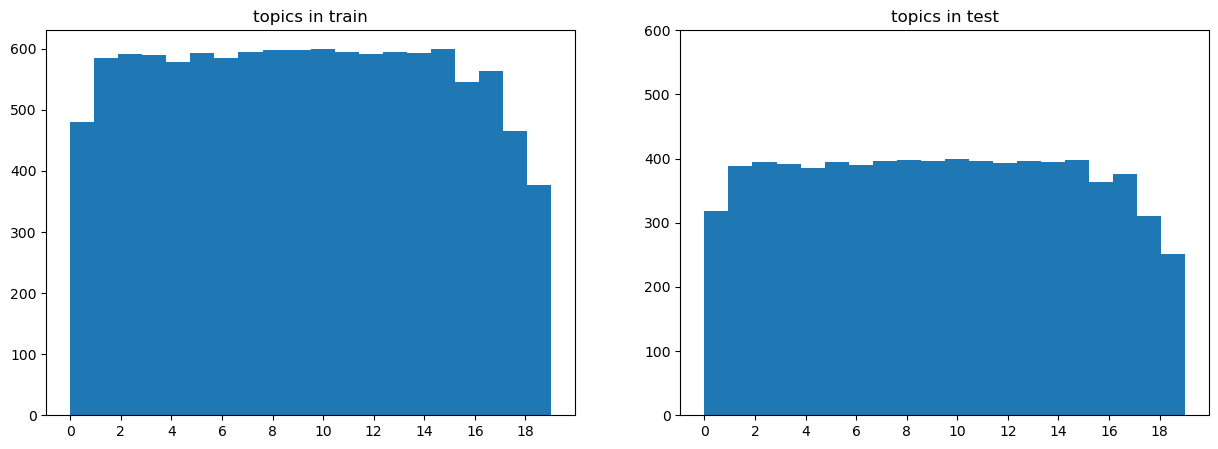

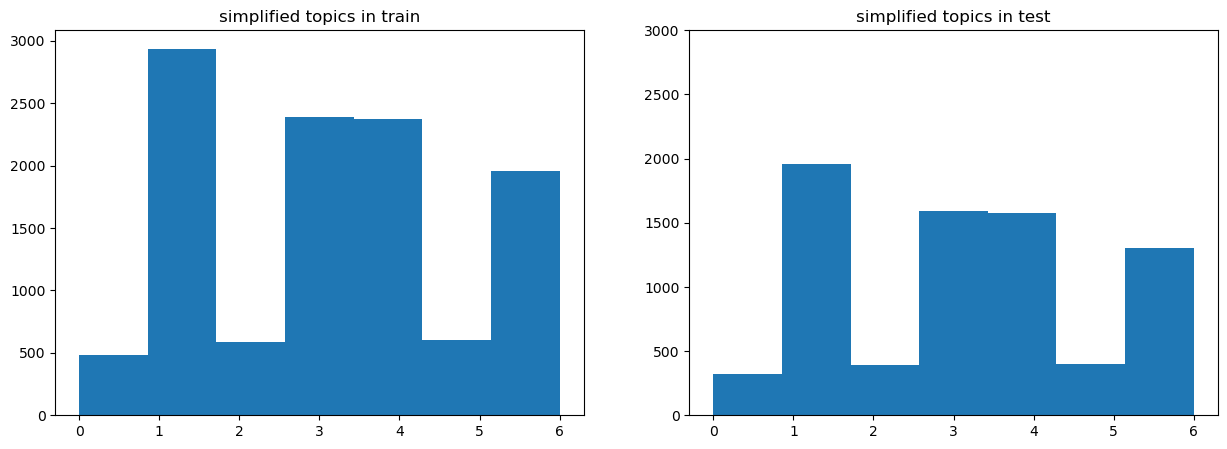

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# topics in datasets
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ds_train['label'],bins=20)
plt.title('topics in train')
plt.xticks(np.arange(0,20,2))
plt.yticks(np.arange(0,650,100))

plt.subplot(1,2,2)
plt.hist(ds_test['label'],bins=20)
plt.title('topics in test')
plt.xticks(np.arange(0,20,2))
plt.yticks(np.arange(0,650,100))

# simple opics in datasets
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ds_train['simple_topic'],bins=7)
plt.title('simplified topics in train')
plt.yticks(np.arange(0,3200,500))

plt.subplot(1,2,2)
plt.hist(ds_test['simple_topic'],bins=7)
plt.title('simplified topics in test')
plt.yticks(np.arange(0,3200,500))

# Preprocessing

In [38]:
# remove newlines
ds_train['preprocess'] = ds_train['text'].str.replace('\n',' ')
ds_test['preprocess'] = ds_test['text'].str.replace('\n',' ')

# remove HTML
ds_train['preprocess'] = ds_train['preprocess'].apply(lambda x: remove_html(x))
ds_test['preprocess'] = ds_test['preprocess'].apply(lambda x: remove_html(x))

#remove URLs
ds_train['preprocess'] = ds_train['preprocess'].apply(lambda x: remove_urls(x))
ds_test['preprocess'] = ds_test['preprocess'].apply(lambda x: remove_urls(x))

# remove emails
ds_train['preprocess'] = ds_train['preprocess'].apply(lambda x: remove_emails(x))
ds_test['preprocess'] = ds_test['preprocess'].apply(lambda x: remove_emails(x))

# remove punctuation
ds_train['preprocess'] = ds_train['preprocess'].apply(lambda x: remove_punctuation(x))
ds_test['preprocess'] = ds_test['preprocess'].apply(lambda x: remove_punctuation(x))

# convert to lowercase
ds_train['preprocess'] = ds_train['preprocess'].str.lower()
ds_test['preprocess'] = ds_test['preprocess'].str.lower()

# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

stop_words = stopwords.words('english')
def remove_stopwords(text):
    # Tokenize the text (assuming it's a string)
    words = text.split()
    
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    return " ".join(filtered_words) # Return as a string

ds_train['no_stopword'] = ds_train['preprocess'].apply(lambda x: remove_stopwords(x))
ds_test['no_stopword'] = ds_test['preprocess'].apply(lambda x: remove_stopwords(x))

#save to pkl
ds_train.to_pickle('pickles/ds_train.pkl')
ds_test.to_pickle('pickles/ds_test.pkl')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ElenaFall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
